# Project



# Setup

In [1]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

np.random.seed(42)


# Get the data

In [2]:
full_data = np.load("DASHlink_full_fourclass_raw_comp.npz")
flight_data = full_data['data']
label = full_data['label']

In [3]:
meta_data = pd.read_csv("DASHlink_full_fourclass_raw_meta.csv")

# Analysing the meta data

In [4]:
meta_data

,data_instance,flight_record,departure_airport,departure_runway,arrival_airport,arrival_runway,label
0,0,652200101120916,KSGF,32,KMEM,36L,0
1,1,652200101121118,KMEM,36L,KMCI,1L,0
2,2,652200101121341,KMCI,19R,KMEM,36R,0
3,3,652200101130002,KMEM,18C,KPNS,17,0
4,4,652200101130451,KPNS,35,KMEM,36R,0
...,...,...,...,...,...,...,...
99832,99832,687200309091549,KFAR,36,KMSP,30L,3
99833,99833,687200402251304,KDTW,21L,KEWR,22L,3
99834,99834,687200403240306,KEWR,22L,KDTW,21L,3
99835,99835,687200403260749,KCLE,6L,KDTW,3R,3


#### Overview of Metadata:
- The metadata provided contains detailed information about the flights from which the data was collected.
- It includes essential details such as the flight record, departure airport, and other relevant flight-specific information.

#### Importance of Labels:
- The metadata's most crucial aspect is the labels associated with each instance.
- These labels serve as identifiers for different classes or categories within the dataset.

#### Utilization in Data Processing:
- **Filtering Data:**
  - We leverage the labels to filter out specific instances or subsets of the data that correspond to our target classes.
  - This ensures that our analysis focuses only on relevant instances aligned with our objectives.

- **Data Splitting:**
  - The labels are instrumental in splitting the dataset into training, validation, and testing sets.
  - This segregation facilitates robust model training, validation, and evaluation processes, essential for building reliable machine learning models.

#### Enhancing Data Understanding:
- By incorporating metadata, we gain a deeper understanding of the underlying context and characteristics of the dataset.
- Understanding the flight-specific attributes and labels aids in formulating effective data processing and modeling strategies.

## Analyse the flight data

In [5]:
flight_data.shape

(99837, 160, 20)

In [6]:
pd.DataFrame(flight_data[:5,:1,: ].reshape(5,20), columns= ['AILERON POSITION LH', 'AILERON POSITION RH', 'ANGLE OF ATTACK (CORRECTED)', 'ALTITUDE (BARO CORRECT)', 'COMPUTED AIRSPEED LSP', 'SELECTED COURSE','DRIFT ANGLE' ,'ELEVATOR POSITION LEFT' ,'FLAP POSITION' , 'GLIDESLOPE DEVIATION', 'SELECTED HEADING' , 'LOCALIZER DEVIATION', 'CORE SPEED AVG',  'TOTAL PRESSURE LSP', 'PITCH ANGLE LSP', 'ROLL ANGLE LSP', 'RUDDER POSITION', 'TRUE HEADING LSP', 'VERTICAL ACCELERATION', 'WIND SPEED'])

,AILERON POSITION LH,AILERON POSITION RH,ANGLE OF ATTACK (CORRECTED),ALTITUDE (BARO CORRECT),COMPUTED AIRSPEED LSP,SELECTED COURSE,DRIFT ANGLE,ELEVATOR POSITION LEFT,FLAP POSITION,GLIDESLOPE DEVIATION,SELECTED HEADING,LOCALIZER DEVIATION,CORE SPEED AVG,TOTAL PRESSURE LSP,PITCH ANGLE LSP,ROLL ANGLE LSP,RUDDER POSITION,TRUE HEADING LSP,VERTICAL ACCELERATION,WIND SPEED
0,81.26119,82.652336,-8.111792,1969.6174,155.57140,-2.109358,-0.692778,-4.952854,3065.0,0.01794,-2.109358,6.664000e-03,70.741180,985.42550,-3.662261,0.785912,-0.390141,-1.081870,0.972379,12.625183
1,78.11066,78.499360,-6.283905,3301.5562,181.57553,7.997990,-1.273455,-5.873463,2493.0,0.14586,-19.072126,-1.856120e-01,62.359978,958.36140,-3.243135,4.222164,-0.449211,-27.665743,0.886602,7.155745
2,83.12287,84.084400,-6.924273,2299.1843,163.21909,-2.109358,-1.048549,-5.709801,3033.0,0.16731,-30.058378,-2.208920e-01,61.374794,976.13055,-3.144456,0.344788,-0.824351,-14.638681,1.025044,6.185529
3,82.30455,83.716156,-9.820179,1764.7753,161.22673,165.936330,-2.306871,-3.479878,3050.0,-0.00234,165.936330,1.568000e-03,62.173885,992.32710,-4.844926,2.088267,-1.032340,168.298400,-0.087110,9.093069
4,80.64745,82.468216,-11.309158,1967.4978,138.26576,-2.109358,-3.178547,-5.853004,3700.0,0.00936,-2.109358,7.401487e-17,62.165314,977.05096,-5.632410,-0.406570,-0.640512,2.297373,0.871211,10.070789


### Description of Data Shown Above

- **Temporal Scope:**
  - The data pertains to the initial second of observation for a set of five aircraft.

- **Temporal Granularity:**
  - Specifically captures information from the first moment of observation, offering a snapshot of each aircraft's state at that precise instant.

- **Limited Aircraft Sample:**
  - The dataset encompasses a small sample size of only five aircraft, providing a focused view of their characteristics and behaviors at the onset of observation.

- **Purposeful Selection:**
  - The selection of this initial moment allows for the examination of the aircraft's immediate status and conditions, potentially influencing subsequent analysis and decision-making processes.

- **Scope Clarification:**
  - It's important to note that the data concentrates solely on the first second of observation for each aircraft, offering a narrow but detailed perspective on their initial states.

| data_instance | flight_record     | departure_airport | departure_runway | arrival_airport | arrival_runway | label |
|---------------|-------------------|-------------------|------------------|-----------------|----------------|-------|
| 0             | 652200101120916   | KSGF              | 32               | KMEM            | 36L            | 0     |
| 1             | 652200101121118   | KMEM              | 36L              | KMCI            | 1L             | 0     |
| 2             | 652200101121341   | KMCI              | 19R              | KMEM            | 36R            | 0     |
| 3             | 652200101130002   | KMEM              | 18C              | KPNS            | 17             | 0     |
| 4             | 652200101130451   | KPNS              | 35               | KMEM            | 36R            | 0     |



In [7]:
pd.DataFrame(flight_data[:1,:160,: ].reshape(160,20), columns= ['AILERON POSITION LH', 'AILERON POSITION RH', 'ANGLE OF ATTACK (CORRECTED)', 'ALTITUDE (BARO CORRECT)', 'COMPUTED AIRSPEED LSP', 'SELECTED COURSE','DRIFT ANGLE' ,'ELEVATOR POSITION LEFT' ,'FLAP POSITION' , 'GLIDESLOPE DEVIATION', 'SELECTED HEADING' , 'LOCALIZER DEVIATION', 'CORE SPEED AVG',  'TOTAL PRESSURE LSP', 'PITCH ANGLE LSP', 'ROLL ANGLE LSP', 'RUDDER POSITION', 'TRUE HEADING LSP', 'VERTICAL ACCELERATION', 'WIND SPEED'])

,AILERON POSITION LH,AILERON POSITION RH,ANGLE OF ATTACK (CORRECTED),ALTITUDE (BARO CORRECT),COMPUTED AIRSPEED LSP,SELECTED COURSE,DRIFT ANGLE,ELEVATOR POSITION LEFT,FLAP POSITION,GLIDESLOPE DEVIATION,SELECTED HEADING,LOCALIZER DEVIATION,CORE SPEED AVG,TOTAL PRESSURE LSP,PITCH ANGLE LSP,ROLL ANGLE LSP,RUDDER POSITION,TRUE HEADING LSP,VERTICAL ACCELERATION,WIND SPEED
0,81.261190,82.652336,-8.111792,1969.61740,155.571400,-2.109358,-0.692778,-4.952854,3065.0,0.01794,-2.109358,0.006664,70.741180,985.42550,-3.662261,0.785912,-0.390141,-1.081870,0.972379,12.625183
1,79.604095,81.015700,-7.644611,1955.69950,154.512050,-2.109358,-0.867216,-5.198349,3065.0,0.01950,-2.109358,0.007448,70.717750,985.52030,-3.665276,0.046774,-0.756234,-0.704820,0.770077,11.893839
2,81.302110,80.770200,-7.552573,1940.02670,153.328670,-2.109358,-1.424093,-4.830105,3065.0,0.01872,-2.109358,0.009604,70.702760,985.41650,-3.940319,0.804820,-1.325632,-0.240446,0.543937,12.559112
3,82.345470,83.900276,-8.395265,1924.54930,150.888180,-2.109358,-1.141912,-4.625526,3065.0,0.01677,-2.109358,0.009408,70.741590,984.81710,-4.275129,1.077102,-0.326884,-0.191627,1.062817,10.542998
4,81.874930,82.754620,-7.854284,1905.36700,150.694610,-2.109358,-0.724660,-4.400490,3065.0,0.01677,-2.109358,0.009408,70.570450,985.23065,-4.241483,1.654806,0.129545,-0.528425,0.867628,9.713539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,79.542725,82.038600,-3.399119,369.51834,116.645760,-2.109358,-1.466813,-2.436520,3701.0,-0.04017,-2.109358,-0.010192,79.387634,1024.64040,-1.882211,-0.315151,-1.063202,0.573140,0.987543,9.934987
156,80.258750,80.136000,-2.238594,357.74258,116.160164,-2.109358,-1.488424,-1.229500,3701.0,-0.08034,-2.109358,-0.006664,79.338200,1024.79610,-1.309721,-0.224883,-0.209496,0.299006,0.990345,8.879451
157,78.847150,81.936310,0.149757,346.11517,114.936070,-2.109358,-1.614193,-2.027359,3701.0,-0.12519,-2.109358,-0.003724,79.454490,1024.89700,0.100387,0.674243,-0.894619,0.687853,1.082752,9.047807
158,83.900276,84.698135,1.317100,335.11508,114.101250,-2.109358,-1.529666,-2.047817,3701.0,-0.16380,-2.109358,-0.005684,79.324840,1024.83230,0.681758,1.592121,-1.356709,0.513559,1.050346,8.270673


### Description of Data shown above

- **Data Snapshot Duration:**
  - Collected data over a 160-second duration.
  - Captured information from the initial phase of the aircraft's descent, specifically before landing.

- **First Plane's Data:**
  - The data pertains to the initial aircraft in the landing sequence.
  - Information recorded during the critical moments preceding the aircraft's touchdown.



| data_instance | flight_record     | departure_airport | departure_runway | arrival_airport | arrival_runway | label |
|---------------|-------------------|-------------------|------------------|-----------------|----------------|-------|
| 0             | 652200101120916   | KSGF              | 32               | KMEM            | 36L            | 0     |


# Check the missing values

In [8]:

missing_values = np.isnan(flight_data)
missing_values= missing_values.flatten()
# Display the mask of NaN values
print(missing_values.sum())

0


### Data Completeness

- **Absence of Missing Values:**
  - The dataset provided comprises a 160-second window snapshot of approximately 99,000 flights during their final approach, specifically when they are crossing 1,000 ft before touchdown.
  - Despite the extensive nature of the dataset, it is noteworthy that there are no missing values present within it.

### Implications

- **Data Integrity:**
  - The absence of missing values indicates that each observation in the dataset contains complete information for all variables.
  - This ensures the integrity and reliability of the dataset for analysis and modeling purposes.

- **Enhanced Model Performance:**
  - Models trained on complete data are likely to exhibit better performance and generalization capabilities compared to models trained on incomplete or imputed data.

- **Effective Anomaly Detection:**
  - In the context of anomaly detection, the absence of missing values ensures that anomalies are identified based on a comprehensive and uninterrupted dataset, improving the reliability of anomaly detection outcomes.



# Split the data into train and test

In [9]:
x= meta_data.groupby('label').count()
pd.DataFrame(x['data_instance'])


,data_instance
label,
0,89663
1,7013
2,2207
3,954


In [10]:
nominal_landings= flight_data[meta_data['label']==0]
abnormal_landings= flight_data[meta_data['label']!=0]

In [11]:
nominal_landings_test= nominal_landings[len(nominal_landings)-10000+1:]
nominal_landings_train_val= nominal_landings[:len(nominal_landings)-10000]

In [12]:
test_set = np.concatenate((nominal_landings_test,abnormal_landings),axis=0)
test_set_key = np.concatenate(([0]*len(nominal_landings_test),[1]*len(abnormal_landings)),axis=0)

In [13]:
np.random.seed(42)

train_set, validation_set = train_test_split(nominal_landings_train_val, test_size=0.3)

### Optimal Data Split Strategy for Effective Anomaly Detection Model Training and Evaluation

### Train-Test Split Strategy

#### Data Overview:
- The provided data captures a 160-second window snapshot of approximately 99,000 flights during their final approach when crossing 1,000 ft before touchdown.
- It encompasses three different anomaly types and one nominal class, highlighting the presence of both normal and anomalous instances within the dataset.

#### Imbalanced Class Distribution:
- **Data Instance and Class Distribution:**
  - The dataset contains a disproportionate number of normal values compared to anomalous instances.
  - Class distribution:
    - Nominal: 89,663 instances
    - Speed High: 7,013 instances
    - Path High: 2,207 instances
    - Flaps Late Setting: 954 instances

#### Train-Test Split Strategy:
- **Objective:**
  - Ensure a representative portion of both normal and anomalous instances is included in both training and validation sets.
  
- **Approach:**
  - Utilize 79,000 normal instances for training the autoencoder.
  - Reserve a total of 10,000 normal instances for validation during model fitting.
  - Maintain the integrity of class proportions in both the training and validation datasets.

#### Implications:
- **Balance and Generalization:**
  - By allocating a substantial portion of normal instances for training, the autoencoder can learn the characteristics of normal flight behavior effectively.
  - Validation on a separate set of normal instances ensures the model's ability to generalize to unseen normal data.

- **Anomaly Detection Performance:**
  - Ensuring a representative proportion of anomalies in the training set is crucial for the autoencoder to learn to distinguish between normal and anomalous instances effectively.
  - Validation on normal instances helps evaluate the model's ability to detect anomalies while minimizing false positives.

#### Considerations:
- **Class Importance:**
  - The disproportionate class distribution necessitates careful consideration in the train-test split strategy.
  - Balancing the representation of all classes ensures that the model does not become biased towards the majority class.

- **Validation Set Size:**
  - The choice of 10,000 normal instances for validation strikes a balance between having a sufficiently large validation set and preserving an adequate training set size.

#### Conclusion:
- The train-test split strategy ensures that the autoencoder is trained on a representative dataset while validating its performance on unseen data.
- By considering the class distribution and dataset size, the strategy aims to optimize the model's ability to accurately detect anomalies during final approach flights.

# Data Preprocessing

For the dataset obtained from DASHlink, which focuses on multi-class anomaly classification in aviation, the preprocessing steps are straightforward due to the clean and continuous nature of the data. Here are the key points:

- **No Missing Values**: The dataset is complete with no missing entries, which simplifies the preprocessing as there is no need for imputation techniques.
  
- **Continuous Variables**: All the variables in the dataset, such as airspeed, altitude, and angle of attack, are continuous. This eliminates the need for any form of encoding that is typically required for categorical data.
  
- **Scaling of Data**: The only preprocessing step required is the scaling of data. Since the dataset features, like 'True Heading', 'Pitch Angle', and 'Aileron Position', vary widely in their ranges, scaling is essential to normalize these ranges which helps in the effective performance of machine learning models.
  
- **No Need for a Pipeline**: Given that the preprocessing is limited to just scaling, the use of a complex pipeline is unnecessary. This simplifies the preprocessing phase, allowing for direct application of scaling methods on the dataset before proceeding with model training.

This approach ensures that the data is properly conditioned for any statistical modeling or machine learning algorithms that will be applied, focusing purely on extracting meaningful insights from the clean and well-structured dataset provided.

In [14]:
x= train_set.shape

x_val = validation_set.shape

t= test_set.shape

#print(x_val[0]*x_val[1],x_val[2])


In [15]:
print(test_set.shape)

(20173, 160, 20)


In [16]:
scaler = StandardScaler()

train_set_scaled= scaler.fit_transform(train_set.reshape(x[0]*x[1],x[2])) 

validation_set_scaled = scaler.transform(validation_set.reshape(x_val[0]*x_val[1],x_val[2]))

test_set_scaled = scaler.transform(test_set.reshape(t[0]*t[1],t[2]))

In [17]:
train_set1 = train_set_scaled.reshape(x[0],x[1],x[2])
validation_set1 = validation_set_scaled.reshape(x_val[0],x_val[1],x_val[2])
test_set1 = test_set_scaled.reshape(t[0],t[1],t[2])

In [18]:
train_set_flatten = tf.convert_to_tensor(train_set1.reshape(-1,3200))

validation_set_flatten = tf.convert_to_tensor(validation_set1.reshape(-1,3200))

test_set_flatten = tf.convert_to_tensor(test_set1.reshape(-1,3200))

In [19]:
print(train_set_flatten)

tf.Tensor(
[[ 1.16121220e-01  5.33582670e-01  3.03246216e-01 ... -3.89681574e-01
   3.20285845e-01 -6.73667391e-01]
 [ 1.10375156e-01  2.90175170e-01 -4.26001726e-01 ... -9.68892120e-01
   3.25882076e-01 -1.14264201e+00]
 [-1.53878370e-01 -5.75656719e-01  1.01605719e+00 ...  4.16234080e-01
   3.34577154e-01 -9.76053064e-01]
 ...
 [ 3.17183484e-01  2.79744136e-01 -1.43046797e-02 ... -1.23677658e+00
   4.65283130e-01 -6.46875378e-01]
 [-3.69303127e-01 -1.91247103e-03  1.74174708e-01 ... -6.64201885e-01
   4.85139270e-01 -1.27998060e+00]
 [-3.66431218e-01 -2.34888088e-01  2.81338745e+00 ...  8.64509751e-02
   2.03365282e-01 -9.42620082e-01]], shape=(55764, 3200), dtype=float64)


## Creating the autoencoder model

In [20]:


input_dim = 160*20
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(800, activation='relu'))
autoencoder.add(Dense(200, activation='relu'))
autoencoder.add(Dense(50, activation='relu'))
autoencoder.add(Dense(12, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(12, activation='relu'))
autoencoder.add(Dense(50, activation='relu'))
autoencoder.add(Dense(200, activation='relu'))
autoencoder.add(Dense(800, activation='relu'))
autoencoder.add(Dense(input_dim, activation=None))

# NOTE: The output layer of a Keras autoencoder includes a sigmoid activation function
# because it forces the output to be in the range. This is done to ensure that the 
# output can be interpreted as a probability or a pixel intensity of a grayscale image.

# Compile the autoencoder model
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │       2,560,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         160,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 200)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 800)                 │         160,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3200)                │       2,563,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,466,674 (20.85 MB)

 Trainable params: 5,466,674 (20.85 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_set_flatten, # For autoencoders, both the input and the target are the same
    y=train_set_flatten, 
    epochs=100, 
    batch_size=128,
    shuffle=True, 
    validation_data=(validation_set_flatten, validation_set_flatten),
    callbacks=[early_stop]
)

Epoch 1/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - loss: 0.6246 - val_loss: 0.4347
Epoch 2/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - loss: 0.4206 - val_loss: 0.3944
Epoch 3/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - loss: 0.3828 - val_loss: 0.3718
Epoch 4/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - loss: 0.3590 - val_loss: 0.3577
Epoch 5/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - loss: 0.3481 - val_loss: 0.3547
Epoch 6/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.3431 - val_loss: 0.3371
Epoch 7/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 0.3290 - val_loss: 0.3299
Epoch 8/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - loss: 0.3215 - val_loss: 0.3265
Epoch 9/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - loss: 0.3165 - val_loss: 0.3255
Epoch 10/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - loss: 0.3147 - val_loss: 0.3234
Epoch 11/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.3104 - val_loss: 0.3193
Epoch 12/100
436/43

436/436 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - loss: 0.2663 - val_loss: 0.3002
Epoch 68/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.2654 - val_loss: 0.2998
Epoch 69/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - loss: 0.2645 - val_loss: 0.2997
Epoch 70/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - loss: 0.2651 - val_loss: 0.3007
Epoch 71/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - loss: 0.2625 - val_loss: 0.3014
Epoch 72/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - loss: 0.2655 - val_loss: 0.2985
Epoch 73/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - loss: 0.2640 - val_loss: 0.2999
Epoch 74/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - loss: 0.2675 - val_loss: 0.3013
Epoch 75/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.2637 - val_loss: 0.2997
Epoch 76/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - loss: 0.2632 - val_loss: 0.3003
Epoch 77/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - loss: 0.2631 - val_loss: 0.2992
Epoch 78/100
436/436 ━

# Plot training and validation loss scores against the number of epochs.

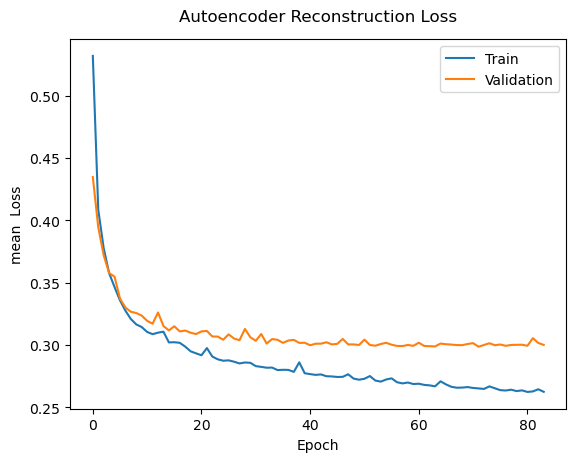

In [42]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('mean  Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Analysis of Loss Graph

#### Graphical Representation
- The provided data consists of loss values for both training and validation sets across multiple epochs.
- The loss values are plotted against the number of epochs, providing insight into the model's performance over time.

#### Interpretation
- **Training Loss:**
  - Shows a decreasing trend over epochs, indicating that the model is learning and minimizing its error on the training data.
  - Initially starts at a higher value and gradually decreases as the model iteratively improves its performance.

- **Validation Loss:**
  - Also exhibits a decreasing trend, reflecting the model's ability to generalize to unseen data.
  - Generally follows the trend of the training loss, albeit with some fluctuations.

#### Implications
- **Model Training:**
  - The decreasing training and validation loss suggests that the model is effectively learning from the data and improving its performance over time.
  - Consistent decrease in loss indicates successful convergence of the model during training.

- **Overfitting Consideration:**
  - Close alignment between training and validation loss curves suggests that overfitting is relatively well-controlled.
  - Fluctuations in the validation loss may indicate occasional overfitting episodes or model instability, warranting further investigation.

#### Train-Test Split Strategy
- **Validation Set Usage:**
  - Validation loss serves as a proxy for evaluating model performance on unseen data, thereby guiding model selection and hyperparameter tuning decisions.
  - The consistency between training and validation loss curves suggests that the train-test split strategy effectively balances model training and evaluation.

- **Generalization:**
  - The decreasing validation loss indicates that the model is generalizing well to unseen data, validating its ability to make accurate predictions beyond the training set.
  - This implies that the selected train-test split strategy adequately captures the underlying data distribution, facilitating robust model evaluation.

### Conclusion
- The loss graph provides valuable insights into the training dynamics and performance of the model.
- Consistent decrease in both training and validation loss signifies successful model convergence and generalization.
- The train-test split strategy appears effective in training and evaluating the model, contributing to its overall reliability and performance.

# Determining the error threshold 

we first plan to calaculate and vizuvalize the error for the entire train set i.e a combination of validation and test data

In [23]:
#autoencoder1 = keras.models.load_model('fully_trained_autoencoder.h5')

## Visualizing Mean Reconstruction Error

- **Calculation and Purpose:**
  - Computed the mean reconstruction error across all 20 variables for each of the 160 snapshots of flight data.
  - Purpose: Condensing the multidimensional error information into a single metric per snapshot simplifies further analysis and provides an overall understanding of model performance.

- **Reasoning:**
  - Aggregating errors into a mean value allows for easier interpretation and comparison across snapshots.
  - Helps in identifying patterns or anomalies that might not be apparent when considering individual error values for each variable separately.

- **Potential Future Alternatives:**
  - Instead of mean error, median error could be calculated to mitigate the influence of outliers.
  - Weighted mean error, considering the importance of each variable, could provide a more nuanced understanding of reconstruction quality.

In [24]:
train_vis = np.concatenate((train_set_flatten,validation_set_flatten), axis = 0)
train_vis.shape

(79663, 3200)

In [26]:
predicted = autoencoder.predict(train_vis)

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step


In [27]:


squared_errors = np.square(train_vis - predicted)
print(f"Mean Squared Error: {squared_errors}")

mean_across_columns = np.mean(squared_errors, axis=1)


Mean Squared Error: [[6.16526364e-04 2.70075602e-01 2.84757188e-02 ... 8.08755866e-02
  2.22435611e-01 3.97657750e-02]
 [4.13530201e-03 3.56745386e-02 6.30852612e-03 ... 2.05893369e-01
  2.82101619e-02 1.05760154e-03]
 [4.56785932e-02 3.68071965e-01 2.86183766e-01 ... 8.35557684e-03
  2.77922190e-01 2.04315990e-04]
 ...
 [2.49526299e-02 1.47791016e-03 1.08104678e-01 ... 4.25317339e-02
  9.82741420e-02 7.23124131e-02]
 [5.25726961e-02 1.43350951e-01 6.98167963e-01 ... 3.24041712e-03
  2.58577100e+00 8.98487818e-03]
 [1.47616701e-02 2.54854604e-02 1.32711240e+00 ... 1.70729002e-02
  3.09174200e-01 4.21433419e-03]]


In [28]:
mean_across_columns.shape

(79663,)

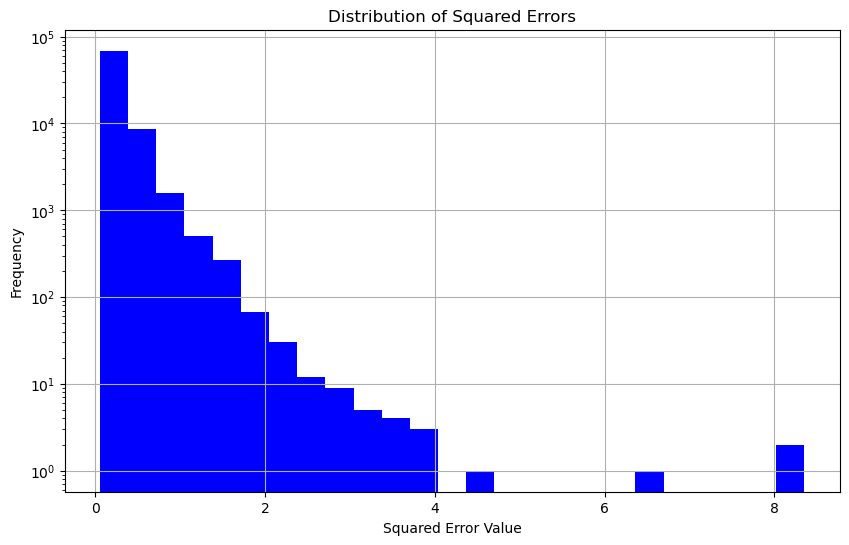

In [29]:
# Plot histogram of the squared errors
plt.figure(figsize=(10, 6))
plt.hist(mean_across_columns.reshape(-1), bins=25, alpha=1, color='blue', log=True)  # Flatten in case of multi-dimensional data
plt.title('Distribution of Squared Errors')
plt.xlabel('Squared Error Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

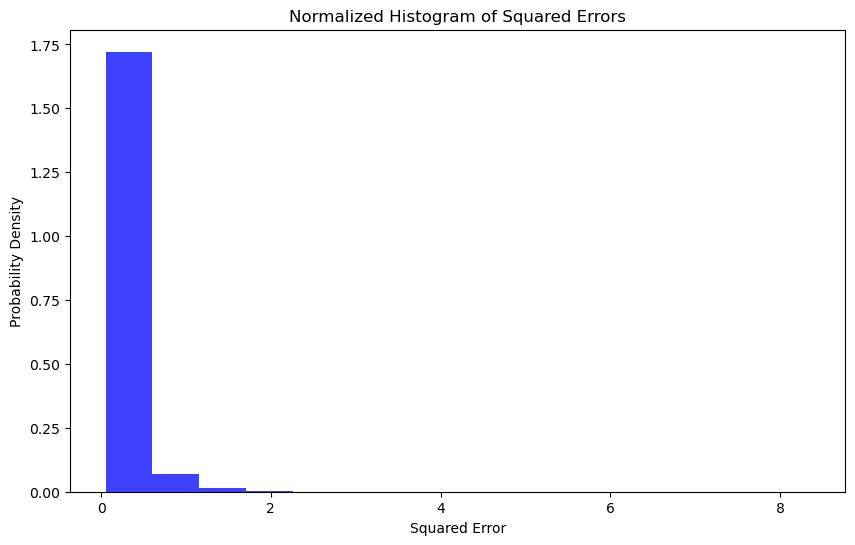

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(mean_across_columns.reshape(-1), bins=15, alpha=0.75, color='blue', density=True)
plt.title('Normalized Histogram of Squared Errors')
plt.xlabel('Squared Error')
plt.ylabel('Probability Density')
plt.show()

## Analyzing Error Distribution
- **Visualization Techniques:**
  - Utilized a histogram and a probability distribution plot to visualize the distribution of mean errors.
  - These techniques provide insights into the spread and shape of the error distribution, aiding in understanding its characteristics.

- **Interpreting Skewness:**
  - Noted the right-skewed nature of the error distribution.
  - Skewness suggests that while most errors are relatively small, there exist some instances with significantly higher errors.

- **Implications:**
  - Understanding the distribution of errors helps in setting appropriate thresholds for anomaly detection.
  - Right-skewness indicates a potential imbalance between normal and anomalous instances, influencing decision-making in anomaly detection.

In [31]:
#autoencoder.save('fully_trained_autoencoder.h5')

## Transforming Error Values
- **Transformation Procedure:**
  - Multiplied error values by 100 to amplify differences and applied a one-plus-log transformation.
  - Purpose: Normalize the error distribution and make it more symmetric, facilitating better analysis and threshold setting.

- **Normalization Rationale:**
  - Amplifying differences between error values enhances the discriminatory power of the model.
  - Log transformation helps in stabilizing variance and reducing the impact of extreme values, leading to a more interpretable error distribution.

- **Effectiveness Evaluation:**
  - Assessed the transformed error distribution for improved symmetry and normality.
  - Ensured that the transformation effectively addressed the right-skewness observed in the original error distribution.

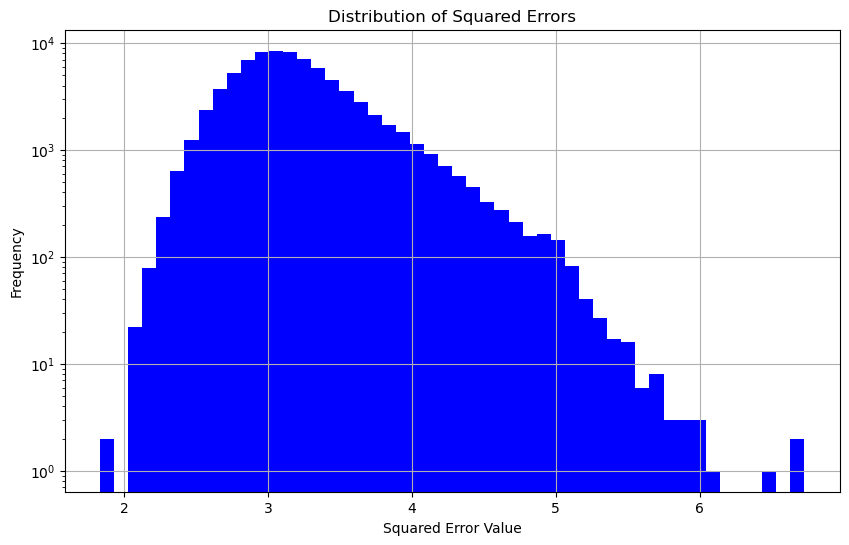

In [32]:
# Plot histogram of the squared errors
log_transformed_arr = np.log1p(mean_across_columns * 100)
plt.figure(figsize=(10, 6))
plt.hist(log_transformed_arr.reshape(-1), bins=50, alpha=1, color='blue', log=True)  # Flatten in case of multi-dimensional data
plt.title('Distribution of Squared Errors')
plt.xlabel('Squared Error Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Calcualting optimal Threshold

In [33]:
median = np.median(log_transformed_arr)
Q1 = np.percentile(log_transformed_arr, 25)
Q3 = np.percentile(log_transformed_arr, 75)
IQR=Q3-Q1

k = 0.01  # Adjust k to manage sensitivity
log_threshold = Q3


threshold = np.expm1(log_threshold) / 100.0



### Determining Threshold for Anomaly Detection

#### Threshold Selection Method:
- **Median vs. 3rd Quartile:**
  - Calculated both the median and the 3rd quartile of the transformed error array.
  - Considered these statistics as thresholds for identifying anomalies within the autoencoder.

#### Robustness Consideration:
- **Advantages of Quartiles:**
  - Utilized the 3rd quartile as the optimal threshold.
  - Quartiles, especially the 3rd quartile, are robust measures less influenced by extreme values compared to the median.
  - Extreme values, which might exist in the error distribution, could unduly influence the median, making it less representative of the typical error magnitude.

#### Statistical Soundness:
- **Representativeness:**
  - The 3rd quartile represents the value below which 75% of the data points lie.
  - By choosing this threshold, anomalies are identified based on a relatively high error value, indicating a substantial deviation from the norm.
  - This ensures that only instances with considerably higher errors, potentially indicative of anomalies, are flagged.

#### Why Not Other Values:
- **95th Percentile or Similar:**
  - While selecting a higher percentile, like the 95th, might seem intuitive for capturing extreme values, it could lead to an overly sensitive threshold.
  - Extreme percentiles are more susceptible to outliers, which might not accurately represent the typical error distribution.
  - Consequently, using such extreme percentiles as thresholds could result in a higher false positive rate, erroneously classifying normal instances as anomalies.

#### Threshold Adjustment Possibilities:
- **Consideration for Context and Use Case:**
  - Alternative thresholding methods, such as statistical significance or domain knowledge-based thresholds, offer flexibility depending on specific requirements.
  - Dynamic thresholding techniques, like adaptive thresholding based on contextual factors or model performance, provide avenues for improving anomaly detection accuracy over time.

In summary, selecting the 3rd quartile as the threshold for anomaly detection offers a balance between robustness and representativeness. It ensures that anomalies are identified based on significant deviations from the norm while mitigating the influence of outliers. Other thresholding options should be carefully considered based on the specific context and desired trade-offs between sensitivity and specificity in anomaly detection.

In [34]:
print(threshold)

0.2977641042979751


# Testing our model

In [35]:
predicted1 = autoencoder.predict(test_set_flatten)

631/631 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [36]:


squared_errors1 = np.square(test_set_flatten - predicted1)
print(f"Mean Squared Error: {squared_errors1}")

mean_across_columns1 = np.mean(squared_errors1, axis=1)


Mean Squared Error: [[1.56244694e-01 1.23417138e-02 1.27059692e+00 ... 3.27389106e-01
  7.59004771e+00 6.54693402e-01]
 [1.74559194e-03 3.06666660e-01 2.04734631e-02 ... 2.18217608e-07
  4.34730148e-04 2.53213179e-01]
 [1.43025894e-01 7.59890706e-03 1.69112993e-02 ... 4.24910437e-03
  9.74020806e-02 2.39000901e-02]
 ...
 [4.78485713e-02 2.66583234e-01 6.41593269e-01 ... 2.00049644e-03
  1.62569376e-01 6.42618075e-01]
 [5.25419172e-04 2.84559628e-01 5.87857338e-02 ... 5.27391197e-02
  1.52654937e-01 2.57993347e-02]
 [6.93261567e-02 8.44559401e-02 8.61134531e-01 ... 2.88551261e-02
  2.37218453e-01 1.92426341e-01]]


In [37]:
mean_across_columns1.shape

(20173,)

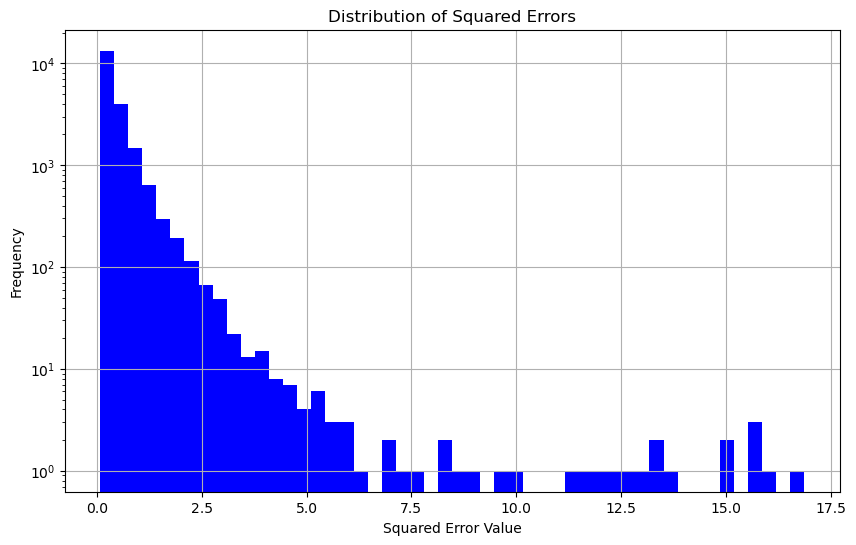

In [38]:
# Plot histogram of the squared errors
plt.figure(figsize=(10, 6))
plt.hist(mean_across_columns1.reshape(-1), bins=50, alpha=1, color='blue', log=True)  # Flatten in case of multi-dimensional data
plt.title('Distribution of Squared Errors')
plt.xlabel('Squared Error Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

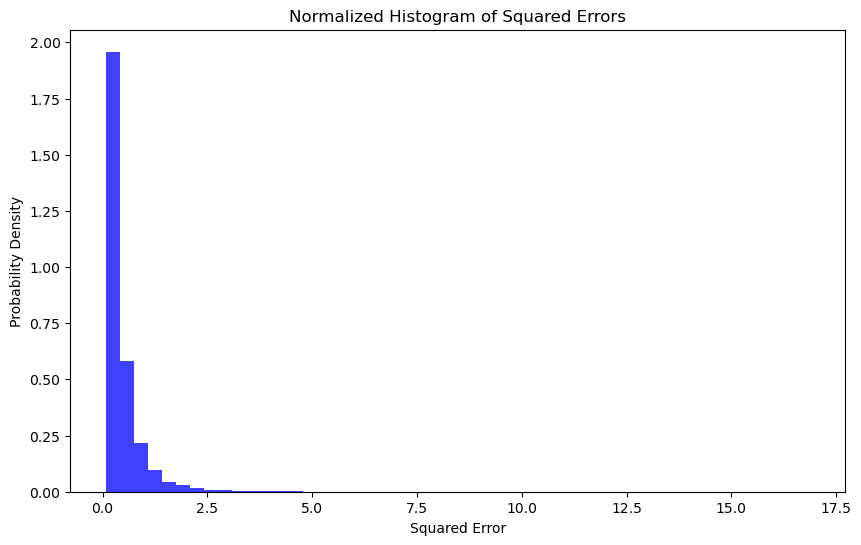

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(mean_across_columns1.reshape(-1), bins=50, alpha=0.75, color='blue', density=True)
plt.title('Normalized Histogram of Squared Errors')
plt.xlabel('Squared Error')
plt.ylabel('Probability Density')
plt.show()

I will be using 1 as my criteria fir evaluation considering a more focus in recall than accuracy

In [40]:
# Get the indices where values are greater than 1
x1 = len(test_set_flatten)
predicted_labels = [0] * x1
for i in range(0,x1,1):
    if mean_across_columns1[i] > threshold:
        predicted_labels[i] = 1





from sklearn.metrics import classification_report

# Generate the confusion matrix
cm = confusion_matrix(test_set_key, predicted_labels)


report = classification_report(test_set_key, predicted_labels)

print("Classification Report:")
print(report)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      9999
           1       0.65      0.66      0.65     10174

    accuracy                           0.65     20173
   macro avg       0.65      0.65      0.65     20173
weighted avg       0.65      0.65      0.65     20173

[[6386 3613]
 [3491 6683]]


### Conclusion and Summary

#### Overview
- The analysis focused on training an autoencoder for anomaly detection in flight data during final approach.
- Various attempts were made to optimize the autoencoder architecture, including different code sizes, slopes, and dropout layers.

#### Autoencoder Optimization Attempts
- **Code Sizes and Slopes Exploration:**
  - Explored different code sizes (100, 50, 25, 12) and slopes (rate of decrease of the size of encoder and increasce for decoder) (2, 3, 4, 5, 6) to find the optimal model.
  - Found that a bottleneck layer size of 6 with a slope of 4 yielded the least complex and most accurate model.

- **Dropout Layer Investigation:**
  - Tested dropout layers to mitigate overfitting but found that they resulted in large loss values and long converging times, without significant improvement in model performance.

- **Layer Width and Number Variation:**
  - Experimented with different layer widths and numbers in each autoencoder but observed similar outcomes, indicating the need for a more elaborate search.

#### Results and Implications
- **Model Performance:**
  - The final model achieved an accuracy of 65%, with precision and recall scores around 65% for both classes.
  - The confusion matrix shows the model's ability to correctly classify both normal and anomalous instances, with some misclassifications.

- **Effectiveness of Optimization Attempts:**
  - Optimization attempts resulted in marginal improvements in model performance but highlighted the need for further refinement.
  - A more nuanced approach, focusing on a steeper encoder with additional complexities, may better capture the dataset's complex nature.

#### Future Directions
- **Integration with CNN or LSTM:**
  - Integrating the autoencoder with a CNN can enhance spatial analysis of snapshot data, potentially improving performance.
  - Similarly, integrating with an LSTM can facilitate the creation of a predictive model for real-time decision support during landing.

- **Continued Model Enhancement:**
  - Further exploration of different architectures and hyperparameters may yield a more effective autoencoder.
  - Consideration of additional features or data preprocessing techniques could enhance model understanding and performance.

In conclusion, while the autoencoder achieved moderate performance, there is room for improvement through continued optimization and integration with complementary models like CNN or LSTM. Further refinement of the model architecture and exploration of additional features may lead to better anomaly detection capabilities in flight data during final approach.

In [47]:
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      9999
           1       0.65      0.66      0.65     10174

    accuracy                           0.65     20173
   macro avg       0.65      0.65      0.65     20173
weighted avg       0.65      0.65      0.65     20173

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [48]:
import pandas as pd

# Data from the classification report
data = {
    "Precision": [0.65, 0.65],
    "Recall": [0.64, 0.66],
    "F1-Score": [0.64, 0.65],
    "Support": [9999, 10174]
}

# Index for the DataFrame
index = ["0", "1"]

# Create DataFrame
df = pd.DataFrame(data, index=index)

# Add an index name
df.index.name = 'Class'

# Display the DataFrame
print(df)


       Precision  Recall  F1-Score  Support
Class                                      
0           0.65    0.64      0.64     9999
1           0.65    0.66      0.65    10174


In [49]:
df


,Precision,Recall,F1-Score,Support
Class,,,,
0,0.65,0.64,0.64,9999
1,0.65,0.66,0.65,10174
